# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [164]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import patsy

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [165]:
#2
def fit_ols_model(y, X):
    model = sm.OLS(y, X).fit()
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    significant_vars = significant_vars[significant_vars != 'Intercept']
    return model, significant_vars
model_tip, significant_vars = fit_ols_model(y, X)
print(model_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.64e-20
Time:                        22:15:01   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

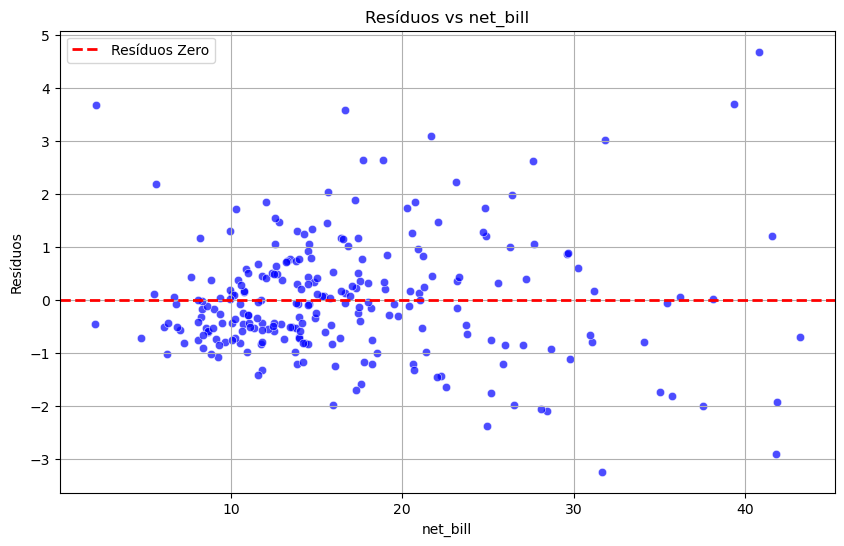

In [166]:
#3
residuals = model_tip.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs net_bill')
plt.legend()
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        22:15:11   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

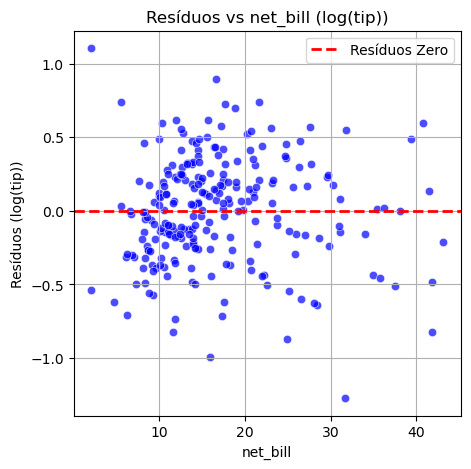

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           4.96e-22
Time:                        22:15:11   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0743      0.353      3.039      0.0

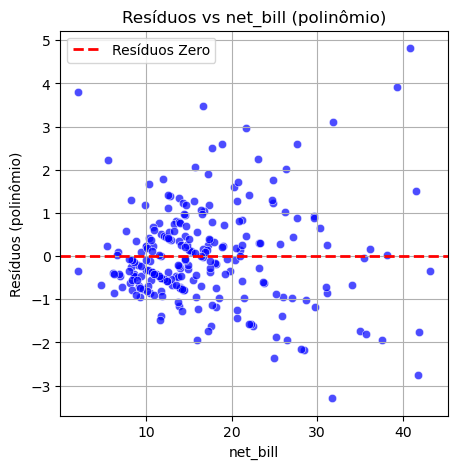

In [168]:
#4
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')
model_tip_log, significant_vars_log = fit_ols_model(y_log, X_log)
print(model_tip_log.summary())
residuals_log = model_tip_log.resid
plt.figure(figsize=(5, 5))
sns.scatterplot(x=tips['net_bill'], y=residuals_log, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')
plt.xlabel('net_bill')
plt.ylabel('Resíduos (log(tip))')
plt.title('Resíduos vs net_bill (log(tip))')
plt.legend()
plt.grid(True)
plt.show()
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(tips[['net_bill']])
y_poly = tips['tip']
model_tip_poly = sm.OLS(y_poly, X_poly).fit()
print(model_tip_poly.summary())
residuals_poly = model_tip_poly.resid
plt.figure(figsize=(5, 5))
sns.scatterplot(x=tips['net_bill'], y=residuals_poly, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')
plt.xlabel('net_bill')
plt.ylabel('Resíduos (polinômio)')
plt.title('Resíduos vs net_bill (polinômio)')
plt.legend()
plt.grid(True)
plt.show()

- o modelo com a transformação logarítmica de net_bill parece melhor, pois tem um diagnóstico de resíduos mais favorável, apesar de ter um R² menor.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [169]:
#1
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [170]:
#2
model_tip_log = sm.OLS(y_log, X_log).fit()
significant_vars_log = model_tip_log.pvalues[model_tip_log.pvalues < 0.05].index
X_log_significant = X_log[significant_vars_log]
model_tip_significant_log = sm.OLS(y_log, X_log_significant).fit()
print(model_tip_significant_log.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.60e-21
Time:                        22:16:22   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

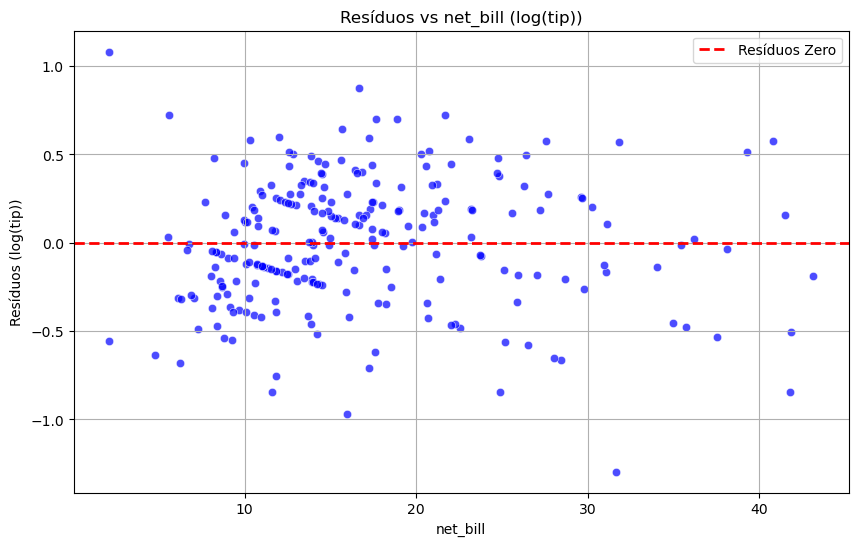

In [171]:
#3
residuals_log = model_tip_significant_log.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals_log, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')
plt.xlabel('net_bill')
plt.ylabel('Resíduos (log(tip))')
plt.title('Resíduos vs net_bill (log(tip))')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
#4
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + np.log(net_bill)', data=tips, return_type='dataframe')
model_tip_log = sm.OLS(y_log, X_log).fit()
print(model_tip_log.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     28.12
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.79e-19
Time:                        22:16:37   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4185      0.145  

In [174]:
#4.1
y_poly, X_poly = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + I(net_bill**2)', data=tips, return_type='dataframe')
model_tip_poly = sm.OLS(y_poly, X_poly).fit()
print(model_tip_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     20.40
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.78e-14
Time:                        22:17:20   Log-Likelihood:                -107.42
No. Observations:                 244   AIC:                             224.8
Df Residuals:                     239   BIC:                             242.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7338      0.067  

In [177]:
#5
tips['predicted_log'] = model_tip_log.predict(X_log)
tips['predicted_poly'] = model_tip_poly.predict(X_poly)
y_log_series = np.exp(y_log).iloc[:, 0]
tips['resid_log'] = np.exp(tips['predicted_log']) - y_log_series
tips['resid_poly'] = np.exp(tips['predicted_poly']) - y_log_series
sst = np.sum((y_log_series - np.mean(y_log_series))**2)
ssr_log = np.sum(tips['resid_log']**2)
ssr_poly = np.sum(tips['resid_poly']**2)
r_squared_tip_log = 1 - (ssr_log / sst)
r_squared_tip_poly = 1 - (ssr_poly / sst)
print('R² log de net_bill:', r_squared_tip_log)
print('R² polinômio de net_bill:', r_squared_tip_poly)

R² log de net_bill: 0.304557611973565
R² polinômio de net_bill: 0.25533325400429874


- o modelo com log de net_bill tem um coeficiente de determinação melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [178]:
#1
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda = previsao_renda.dropna(subset=['tempo_emprego'])
previsao_renda = previsao_renda[~previsao_renda['tempo_emprego'].isin([np.inf, -np.inf])]
X_renda = sm.add_constant(previsao_renda['tempo_emprego'])
y_renda = previsao_renda['renda']
model_renda_simple = sm.OLS(y_renda, X_renda).fit()
print(model_renda_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:18:37   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

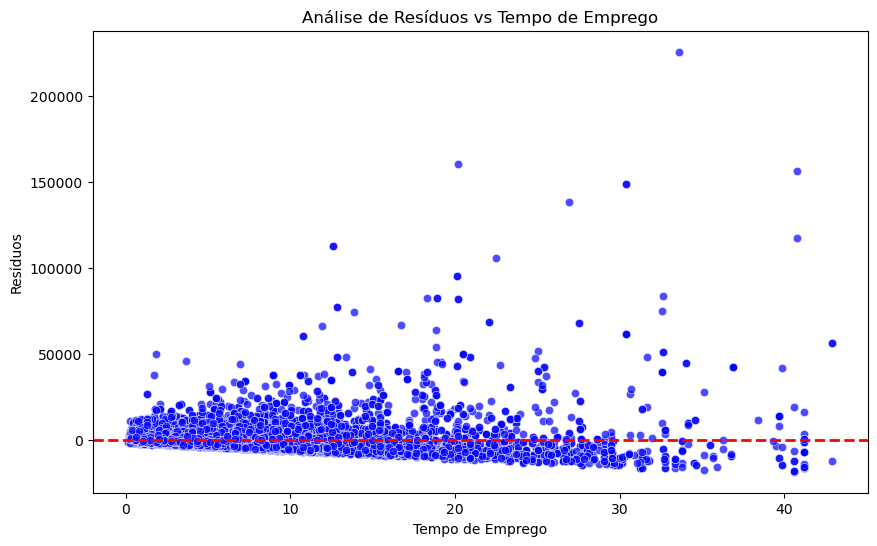

In [179]:
#2
residuals_renda_simple = model_renda_simple.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=previsao_renda['tempo_emprego'], y=residuals_renda_simple, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos vs Tempo de Emprego')
plt.show()

In [180]:
#3
formula = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + tempo_emprego'
y_renda_multi, X_renda_multi = patsy.dmatrices(formula, data=previsao_renda, return_type='dataframe')
model_renda_multi = sm.OLS(y_renda_multi, X_renda_multi).fit()
print(model_renda_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:19:05   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [181]:
#4
significant_vars_renda_multi = [var for var in model_renda_multi.pvalues.index if model_renda_multi.pvalues[var] < 0.05]
X_renda_multi_significant = X_renda_multi[significant_vars_renda_multi]
model_renda_multi_significant = sm.OLS(y_renda_multi, X_renda_multi_significant).fit()
print(model_renda_multi_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     845.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:19:13   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

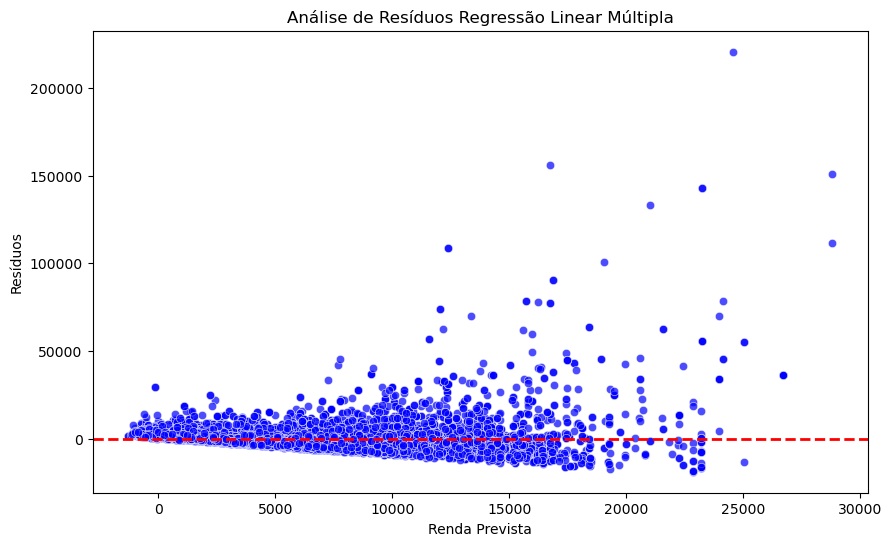

In [182]:
#5
residuals_renda_multi_significant = model_renda_multi_significant.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_renda_multi_significant.fittedvalues, y=residuals_renda_multi_significant, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Renda Prevista')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos Regressão Linear Múltipla')
plt.show()

- Há uma grande concentração de pontos no canto inferior esquerdo o que pode indicar que a variabilidade dos resíduos é menor para valores menores.

- Os pontos próximos a linha vermelha sugerem que o modelo está fazendo boas previsões.